This script aims to demo how to use Edward to inference discrete Bayesian Network
Feel free to leave comment about the demo

In [1]:
import tensorflow as tf
print("tensorflow version: %s" % tf.__version__)
import edward as ed
print("edward version: %s" % ed.__version__)
import edward.models as edm
import edward.inferences as edi
import numpy as np

tensorflow version: 1.3.0
edward version: 1.3.5


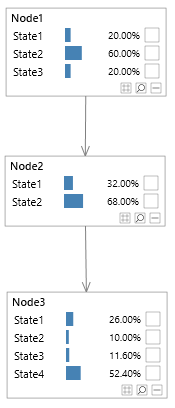

In [3]:
# the structure of the simple bayesian network
# no observation (evidence)
from IPython.display import Image
Image(filename='no_observation.PNG') 

In [4]:
# the Conditional Probability Table of this discrete Bayesian Network
# 1. make sure the shape is able to meet the matmul requirement
# 2. make sure the sum of each row equals to one
# [n,m] with [m,x]
node_1_dist = np.array([[0.2, 0.6, 0.2]], dtype='float32')
node_2_cpt = np.array([[0.1,0.9],[0.3,0.7],[0.6,0.4]],dtype='float32')
node_3_cpt = np.array([[0.6, 0.1, 0.15, 0.15],[0.1,0.1,0.1,0.7]],dtype='float32')

In [5]:
# convert them into tensor
node_1_dist_tensor = tf.cast(node_1_dist, tf.float32)
node_2_cpt_tensor = tf.cast(node_2_cpt, tf.float32)
node_3_cpt_tensor = tf.cast(node_3_cpt, tf.float32)

In [6]:
# network construction
# construct node 1
node_1 = edm.Categorical(probs=node_1_dist_tensor)

# generate node 2's prob table
node_2_prob =tf.matmul(node_1.probs, node_2_cpt_tensor)
node_2 = edm.Categorical(probs= node_2_prob)

# generate node 3's prob table
node_3_prob = tf.matmul(node_2.probs, node_3_cpt_tensor)
node_3 = edm.Categorical(probs = node_3_prob)

In [8]:
# network inference tensor
q_node_1 = edm.Categorical(probs=tf.nn.softmax(tf.Variable(tf.random_normal([1, 3], dtype=tf.float32))))
q_node_2 = edm.Categorical(probs=tf.nn.softmax(tf.Variable(tf.random_normal([1, 2], dtype=tf.float32))))

# set the observation at node 3: state 4
obs = tf.constant([[0.0, 0.0, 0.0, 1.0]], dtype=tf.float32)

In [9]:
# get session
ed.get_session()

# start to inference
# KLpq is used here
inf = edi.KLpq({node_1: q_node_1, node_2: q_node_2},data={node_3.probs: obs})
inf.run(n_samples = 50)

print("-------------------")
print("node 1 inference result: {}".format(q_node_1.probs.eval()))
print("-------------------")
print("node 2 inference result: {}".format(q_node_2.probs.eval()))
print("-------------------")


1000/1000 [100%] ██████████████████████████████ Elapsed: 13s | Loss: 0.006 ETA: 108s | Loss: -0.001

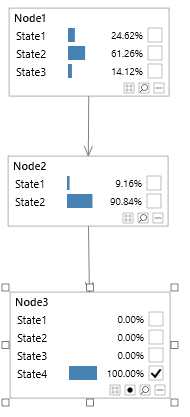

In [11]:
# verify the inference with Bayes Server 
from IPython.display import Image
Image(filename='obs_node3_state4.PNG')

In [12]:
# set the observation at node 3: state 1
obs = tf.constant([[1.0, 0.0, 0.0, 0.0]], dtype=tf.float32)
# get session
ed.get_session()

# start to inference
# KLpq is used here
inf = edi.KLpq({node_1: q_node_1, node_2: q_node_2},data={node_3.probs: obs})
inf.run(n_samples = 50)

print("-------------------")
print("node 1 inference result: {}".format(q_node_1.probs.eval()))
print("-------------------")
print("node 2 inference result: {}".format(q_node_2.probs.eval()))
print("-------------------")


1000/1000 [100%] ██████████████████████████████ Elapsed: 13s | Loss: -0.008

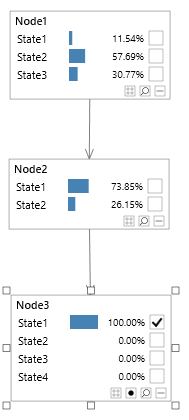

In [13]:
# verify the inference with Bayes Server 
from IPython.display import Image
Image(filename='obs_node3_state1.PNG')

In [14]:
# network inference tensor
q_node_1 = edm.Categorical(probs=tf.nn.softmax(tf.Variable(tf.random_normal([1, 3], dtype=tf.float32))))
#q_node_2 = edm.Categorical(probs=tf.nn.softmax(tf.Variable(tf.random_normal([1, 2], dtype=tf.float32))))
q_node_3 = edm.Categorical(probs=tf.nn.softmax(tf.Variable(tf.random_normal([1, 4], dtype=tf.float32))))

# set the observation at node 2: state 1
obs = tf.constant([[1.0, 0.0]], dtype=tf.float32)

# get session
ed.get_session()

# start to inference
# KLpq is used here
inf = edi.KLpq({node_1: q_node_1, node_3: q_node_3},data={node_2.probs: obs})
inf.run(n_samples = 50)

print("-------------------")
print("node 1 inference result: {}".format(q_node_1.probs.eval()))
print("-------------------")
print("node 3 inference result: {}".format(q_node_3.probs.eval()))
print("-------------------")



1000/1000 [100%] ██████████████████████████████ Elapsed: 13s | Loss: -0.002

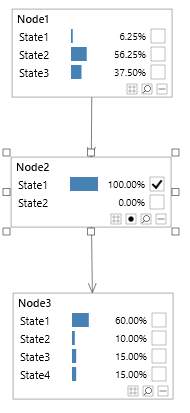

In [15]:
# verify the inference with Bayes Server 
from IPython.display import Image
Image(filename='obs_node2_state1.PNG')

In [17]:
# network inference tensor
q_node_1 = edm.Categorical(probs=tf.nn.softmax(tf.Variable(tf.random_normal([1, 3], dtype=tf.float32))))
#q_node_2 = edm.Categorical(probs=tf.nn.softmax(tf.Variable(tf.random_normal([1, 2], dtype=tf.float32))))
q_node_3 = edm.Categorical(probs=tf.nn.softmax(tf.Variable(tf.random_normal([1, 4], dtype=tf.float32))))

# set the observation at node 2: state 2
obs = tf.constant([[0.0, 1.0]], dtype=tf.float32)

# get session
ed.get_session()

# start to inference
# KLpq is used here
inf = edi.KLpq({node_1: q_node_1, node_3: q_node_3},data={node_2.probs: obs})
inf.run(n_samples = 50)

print("-------------------")
print("node 1 inference result: {}".format(q_node_1.probs.eval()))
print("-------------------")
print("node 3 inference result: {}".format(q_node_3.probs.eval()))
print("-------------------")


1000/1000 [100%] ██████████████████████████████ Elapsed: 13s | Loss: 0.006

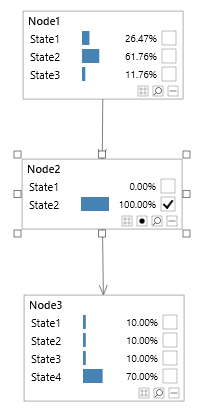

In [16]:
# verify the inference with Bayes Server 
from IPython.display import Image
Image(filename='obs_node2_state2.PNG')